In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')


##### Load CSV data as Pandas DATAFRAME

In [2]:
df=pd.read_csv('data\StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
X=df.drop('math score',axis=1)
y=df['math score']

In [13]:
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [6]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [7]:
print('Categories in gender:',end='')
print(df['gender'].unique())

print('Categories in race/ethnicity:',end='')
print(df['race/ethnicity'].unique())

print('Categories in parental level of education:',end='')
print(df['parental level of education'].unique())

print('Categories in lunch:',end='')
print(df['lunch'].unique())

print('Categories in test preperation course:',end='')
print(df['test preparation course'].unique())

Categories in gender:['female' 'male']
Categories in race/ethnicity:['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education:["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch:['standard' 'free/reduced']
Categories in test preperation course:['none' 'completed']


In [14]:
num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer=StandardScaler()
cat_transformer=OneHotEncoder(drop='first')

preprocessor=ColumnTransformer(
    [
        ('OneHotEncoder',cat_transformer,cat_features),
        ('StandardScaler',num_transformer,num_features)
    ]
)



In [15]:
X=preprocessor.fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 14), (200, 14))

In [20]:
def evaluate_model(true,predicted):
    mae=mean_squared_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    r2Score=r2_score(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    return mae,mse,rmse,r2Score


In [29]:
models={
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'SVR':SVR(),
    'KNeighborsRegressor':KNeighborsRegressor(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'XGBRegressor':XGBRegressor(),
    'CatBoostRegressor':CatBoostRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    mae_train,mse_train,rmse_train,r2Score_train=evaluate_model(y_train_pred,y_train)
    mae_test,mse_test,rmse_test,r2Score_test=evaluate_model(y_test_pred,y_test)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance on training data")
    print('RMSE:',rmse_train)
    print('MSE:',mse_train)
    print('MAE:',mae_train)
    print('R2_score:',r2Score_train)
    print('-'*35)
    print('Model performance on test data')
    print('RMSE:',rmse_test)
    print('MSE:',mse_test)
    print('MAE:',mae_test)
    print('R2_score:',r2Score_test)
    r2_list.append(r2Score_test)
    print('='*35)
    print('\n')



LinearRegression
Model performance on training data
RMSE: 5.323050852720514
MSE: 28.33487038064859
MAE: 28.33487038064859
R2_score: 0.856250345516439
-----------------------------------
Model performance on test data
RMSE: 5.393993869732843
MSE: 29.095169866715494
MAE: 29.095169866715494
R2_score: 0.8670435914705481


Ridge
Model performance on training data
RMSE: 5.323503230682757
MSE: 28.339686647089753
MAE: 28.339686647089753
R2_score: 0.8555838979648909
-----------------------------------
Model performance on test data
RMSE: 5.393585688223997
MSE: 29.090766576214723
MAE: 29.090766576214723
R2_score: 0.8664125017914136


Lasso
Model performance on training data
RMSE: 6.593815587795566
MSE: 43.47840400585579
MAE: 43.47840400585579
R2_score: 0.6903948906164419
-----------------------------------
Model performance on test data
RMSE: 6.519694535667421
MSE: 42.50641683841163
MAE: 42.50641683841163
R2_score: 0.7275365655025168


SVR
Model performance on training data
RMSE: 6.7453891958337

In [30]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2 Score']).sort_values(by='R2 Score',ascending=True)

,Model Name,R2 Score
3,SVR,0.399428
4,KNeighborsRegressor,0.630082
6,DecisionTreeRegressor,0.711166
2,Lasso,0.727537
8,XGBRegressor,0.791261
9,CatBoostRegressor,0.810603
7,RandomForestRegressor,0.822922
5,GradientBoostingRegressor,0.843960
1,Ridge,0.866413
0,LinearRegression,0.867044


#### Linear Regression

In [31]:
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)
y_pred=linear_model.predict(X_test)
print('Accuracry of the model:',r2_score(y_test,y_pred))

Accuracry of the model: 0.8804332983749564


#### Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

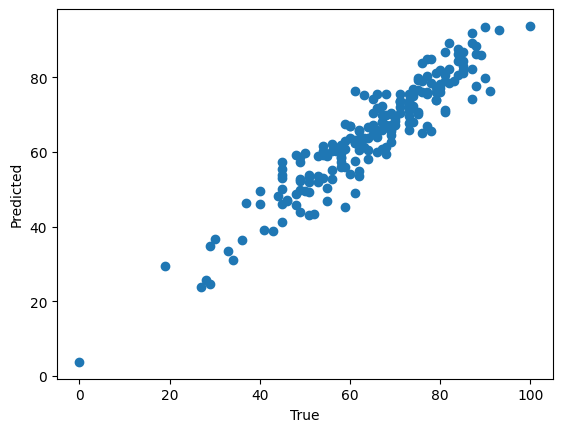

In [32]:
plt.scatter(y_test,y_pred)
plt.xlabel('True')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

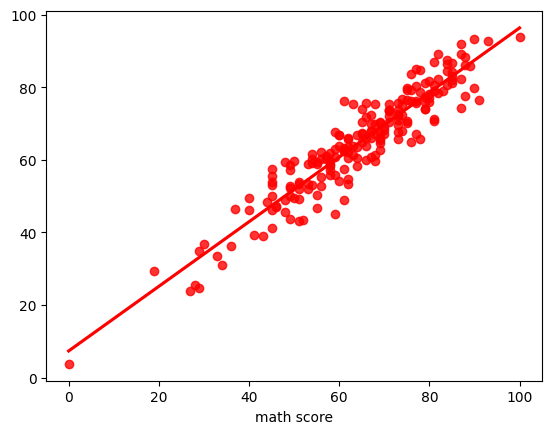

In [33]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

##### Difference between True and Predicted values

In [35]:
pred_diff=pd.DataFrame({'True Values':y_test,'Predicted Values':y_pred,'Differnce':y_test-y_pred})
pred_diff

,True Values,Predicted Values,Differnce
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
